In [ ]:
try:
    credentials = service_account.Credentials.from_service_account_file('/content/golden-frame-459107-h3-a50dcc2a78ba.json')
    project_id = 'online-retail-dwdm-457717'
    client = bigquery.Client(credentials=credentials, project=project_id)
    print("✅ Connected to BigQuery")
except Exception as e:
    print("❌ Error connecting to BigQuery:", e)

✅ Connected to BigQuery


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.cloud import bigquery
client = bigquery.Client()

query = """
SELECT
  h.hotel_name,
  d.year,
  SUM(fb.adr * fb.stays_total_nights) AS total_revenue
FROM golden-frame-459107-h3.data.fact_bookings fb
JOIN golden-frame-459107-h3.data.dim_hotel h ON fb.hotel_key = h.hotel_id
JOIN golden-frame-459107-h3.data.dim_date d ON fb.date_key = d.date_id
GROUP BY h.hotel_name, d.year
ORDER BY h.hotel_name, d.year
"""

df = client.query(query).to_dataframe()
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel_name,year,total_revenue
0,Resort Hotel,2015,1372000.0


In [58]:
 #OLAP Roll-up

query = '''
SELECT d.month, COUNT(*) AS total_bookings
FROM `golden-frame-459107-h3.data.fact_bookings` f
JOIN `golden-frame-459107-h3.data.dim_hotel` h ON f.hotel_key = h.hotel_id
JOIN `golden-frame-459107-h3.data.dim_date` d ON f.date_key = d.date_id
JOIN `golden-frame-459107-h3.data.dim_customer` c ON f.customer_key = c.customer_id
WHERE h.hotel_name = 'Resort Hotel'
GROUP BY d.month
ORDER BY total_bookings DESC
'''
df_rollup_month = client.query(query).to_dataframe()
df_rollup_month.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,month,total_bookings
0,July,5000
1,August,1000
2,December,1000


In [56]:
#OLAP Drill-Down

query = '''
SELECT h.hotel_name, c.market_segment,
       COUNT(*) AS num_bookings,
       ROUND(AVG(f.adr), 2) AS avg_rate
FROM `golden-frame-459107-h3.data.fact_bookings` f
JOIN `golden-frame-459107-h3.data.dim_hotel` h ON f.hotel_key = h.hotel_id
JOIN `golden-frame-459107-h3.data.dim_customer` c ON f.customer_key = c.customer_id
GROUP BY h.hotel_name, c.market_segment
ORDER BY num_bookings DESC
'''
df_drill = client.query(query).to_dataframe()
df_drill.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel_name,market_segment,num_bookings,avg_rate
0,Resort Hotel,Online TA,1000,98.0


In [51]:
#OLAP SLICE

query = '''
SELECT d.month, c.market_segment, COUNT(*) AS total_bookings
FROM `golden-frame-459107-h3.data.fact_bookings` f
JOIN `golden-frame-459107-h3.data.dim_hotel` h ON f.hotel_key = h.hotel_id
JOIN `golden-frame-459107-h3.data.dim_date` d ON f.date_key = d.date_id
JOIN `golden-frame-459107-h3.data.dim_customer` c ON f.customer_key = c.customer_id
WHERE h.hotel_name = 'Resort Hotel'
GROUP BY d.month, c.market_segment
ORDER BY total_bookings DESC
'''
df_slice = client.query(query).to_dataframe()
df_slice.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,month,market_segment,total_bookings
0,July,Online TA,5000
1,August,Online TA,1000
2,December,Online TA,1000


In [60]:
#OLAP DICE

query = '''
SELECT h.hotel_name, c.market_segment, d.month, COUNT(*) AS bookings
FROM `golden-frame-459107-h3.data.fact_bookings` f
JOIN `golden-frame-459107-h3.data.dim_hotel` h ON f.hotel_key = h.hotel_id
JOIN `golden-frame-459107-h3.data.dim_customer` c ON f.customer_key = c.customer_id
JOIN `golden-frame-459107-h3.data.dim_date` d ON f.date_key = d.date_id
WHERE h.hotel_name = 'City Hotel'
  AND c.market_segment IN ('Corporate', 'Group')
  AND d.month = 'August'
GROUP BY h.hotel_name, c.market_segment, d.month
ORDER BY bookings DESC
'''
df_dice = client.query(query).to_dataframe()
df_dice.head()
()
df_dice.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hotel_name,market_segment,month,bookings


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


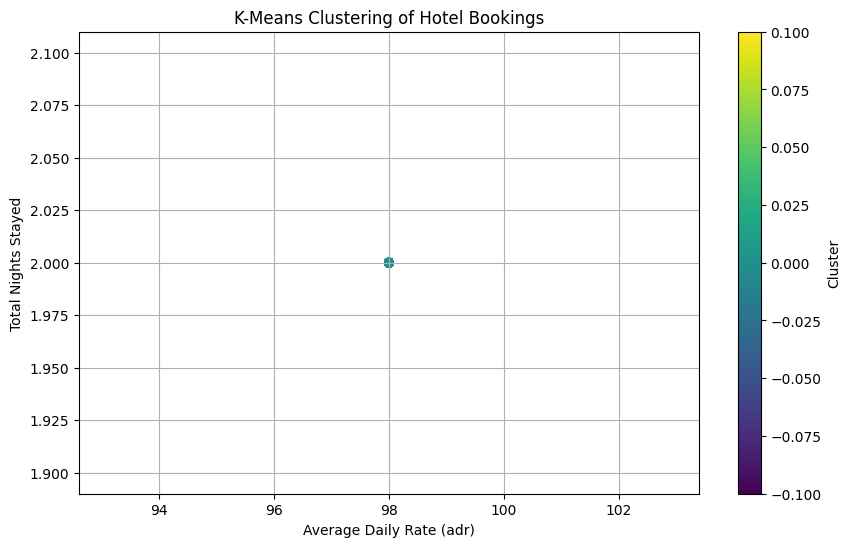

In [ ]:
#K-Means Clustering

from google.cloud import bigquery
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize BigQuery client
client = bigquery.Client()

# Properly formatted SQL query
query = """
SELECT
  adr,
  lead_time,
  stays_total_nights
FROM golden-frame-459107-h3.data.fact_bookings
WHERE is_canceled = 0
LIMIT 10000
"""

# Run the query and load data
df = client.query(query).to_dataframe()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['adr', 'lead_time', 'stays_total_nights']])

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['adr'], df['stays_total_nights'], c=df['cluster'], cmap='viridis')
plt.xlabel("Average Daily Rate (adr)")
plt.ylabel("Total Nights Stayed")
plt.title("K-Means Clustering of Hotel Bookings")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Install required packages
!pip install -q --upgrade google-cloud-bigquery
!pip install -q scikit-learn matplotlib pandas
!pip install -U mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.3
    Uninstalling mlxtend-0.23.3:
      Successfully uninstalled mlxtend-0.23.3


In [ ]:
from google.cloud import bigquery
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

client = bigquery.Client()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
query = """
SELECT
  adr,
  lead_time,
  stays_total_nights
FROM `golden-frame-459107-h3.data.fact_bookings`
WHERE is_canceled = 0
LIMIT 5000
"""

df = client.query(query).to_dataframe()
df.dropna(inplace=True)
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,adr,lead_time,stays_total_nights
0,98.0,14,2
1,98.0,14,2
2,98.0,14,2
3,98.0,14,2
4,98.0,14,2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


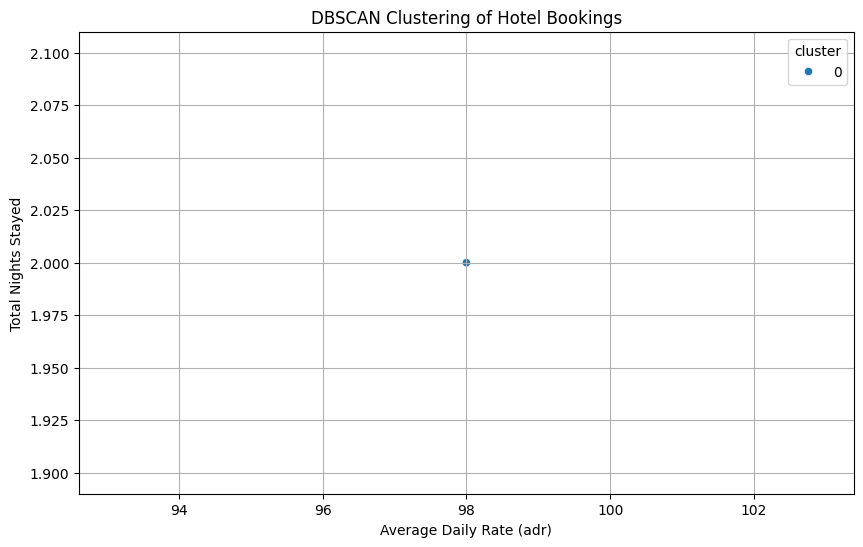

In [48]:
#DBSCAN Clustering

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(df[['adr', 'lead_time', 'stays_total_nights']])

# Apply DBSCAN
db = DBSCAN(eps=0.8, min_samples=10).fit(X)
df['cluster'] = db.labels_

# Visualize
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['adr'], y=df['stays_total_nights'], hue=df['cluster'], palette='tab10')
plt.title("DBSCAN Clustering of Hotel Bookings")
plt.xlabel("Average Daily Rate (adr)")
plt.ylabel("Total Nights Stayed")
plt.grid(True)
plt.show()


In [ ]:
from google.cloud import bigquery
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

client = bigquery.Client()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
query = """
SELECT
  CASE WHEN adr > 150 THEN 'High_ADR' ELSE 'Low_ADR' END AS rate_category,
  CASE WHEN lead_time > 100 THEN 'Advance_Booking' ELSE 'Late_Booking' END AS booking_type,
  CASE WHEN stays_total_nights >= 7 THEN 'Long_Stay' ELSE 'Short_Stay' END AS stay_type
FROM `golden-frame-459107-h3.data.fact_bookings`
WHERE is_canceled = 0
LIMIT 3000
"""

df = client.query(query).to_dataframe()
df.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,rate_category,booking_type,stay_type
0,Low_ADR,Late_Booking,Short_Stay
1,Low_ADR,Late_Booking,Short_Stay
2,Low_ADR,Late_Booking,Short_Stay
3,Low_ADR,Late_Booking,Short_Stay
4,Low_ADR,Late_Booking,Short_Stay


In [ ]:
transactions = df.values.tolist()

te = TransactionEncoder()
te_ary = te.fit_transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Late_Booking,Low_ADR,Short_Stay
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True


In [62]:
!pip install mlxtend


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
# Generate frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

# Generate rules
rules = association_rules(frequent_itemsets)
rules = rules.sort_values(by="lift", ascending=False)
rules.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'